Exploratory Data Analysis (EDA): NYC Airbnb 2019 Listings

THis notebook explores the NYC Airbnb 2019 dataset to understand pricing behavior, variables, and outliers.
The purpose of this EDA is to inform Python data cleansing requirements, ETL, SQL analytics view creation, and Tableau dashboards.

# 1. Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load raw Airbnb NYC 2019 dataset
# Source: Kaggle (AB_NYC_2019.csv)
airbnb_df = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
# View listing details available 
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Generate summary statistics
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 2. Data shape/types

In [7]:
# Inspect dataset structure and data types
airbnb_df.shape[0]
airbnb_df.shape[1]
airbnb_df.info()
airbnb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Data shapes/types - observations:
- Dataset contains ~ 49K listings with details such as pricing, location, and number of reviews.
- Rows with missing info such as listing name, host name, and review data will need to be handled.
- Listing name formatting needs to be standardized.
- Outliers such as unrealistic minimum nights (>30 days) will need to be filtered out.

# Actions:
- Fill missing listing listing names, trim white space, and standardize casing.
- Convert "last_review" to datetime and handle missing listing and host names.
- Listings with "null" for number_of_reviews and last_review will be assigned a default value of 0.

# 3. Data quality checks

In [ ]:
# Find columns with nulls that will need to be delt with
airbnb_df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Check duplicate listing ids
airbnb_df['id'].duplicated().sum()

np.int64(0)

In [12]:
# Count listings with $0 charge per night
airbnb_df.loc[airbnb_df['price'] <= 0, 'price'].value_counts()

price
0    11
Name: count, dtype: int64

# Data quality checks - observations:
- last_review and reviews_per_month each have 10,052 nulls, likely new listings or ones with no reviews.
- Missing data for host_name (21 nulls) and name (16 nulls).
- No duplicate listing IDs detected, ID can be treated as a reliable unique key.

# Actions:
- Fill missing "name" / "host_name" with "Unknown"
- Filter out rows where "price" <= 0 before analysis/database loading.

# 4. Distributions & outliers

Text(0.5, 1.0, 'Rent Price/Night Across NYC AirBnB Listings')

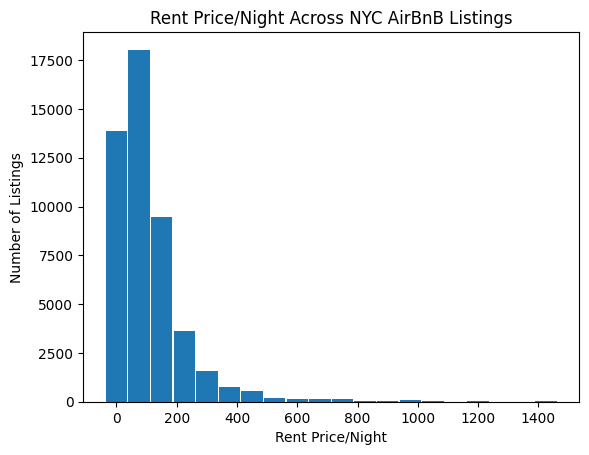

In [5]:
plt.hist(airbnb_df['price'], bins=20, range=(0, 1500), align='left', rwidth=0.95)
plt.xlabel('Rent Price/Night')
plt.ylabel('Number of Listings')
plt.title('Rent Price/Night Across NYC AirBnB Listings')

In [29]:

mean_price = (airbnb_df['price'].mean())

# Summary statistics for nightly price
price_summary = airbnb_df['price'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print(f"mean nightly Airbnb price in NYC: ${mean_price:.2f}")
print(f"price quantiles (USD):\n{price_summary}")

mean nightly Airbnb price in NYC: $152.72
price quantiles (USD):
0.05     40.0
0.25     69.0
0.50    106.0
0.75    175.0
0.95    355.0
Name: price, dtype: float64


# Distributions and Outliers - Observations:
- Most listings are priced on the lower end (the typical listing is $106 a night), while a smaller number of luxury listings are much more expensive (the top 5% are $355+/night), which pulls the average up to $152.72/night.

# Action:
- Break this distribution down by room_type and neighbourhood_group to explore what factors affect pricing.

# 5. Price & Minimum Nights Extremes

In [ ]:
# Get the top 3 and bottom 3 listing prices to quickly see the price extremes in the dataset
most_expensive_abnb = airbnb_df['price'].sort_values(ascending=False).head(3)
least_expensive_abnb = airbnb_df['price'].sort_values(ascending=False).tail(3)
print('The 3 most expensive NYC AirBNB listings are:\n', most_expensive_abnb)
print('The 3 least expensive NYC AirBNB listings are:\n',least_expensive_abnb)

The 3 most expensive NYC AirBNB listings are:
 9151     10000
17692    10000
29238    10000
Name: price, dtype: int64
The 3 least expensive NYC AirBNB listings are:
 25433    0
26841    0
25795    0
Name: price, dtype: int64


In [ ]:
# Show the listings with the highest minimum-night stay requirements to identify unusually long required stays
min_nights = airbnb_df['minimum_nights'].sort_values(ascending=False).head()
print(min_nights)

5767     1250
2854     1000
38664     999
13404     999
26341     999
Name: minimum_nights, dtype: int64


In [ ]:
# Filter and preview listings that have anomalies in minimum nights of stay
min_nights = airbnb_df.loc[airbnb_df['minimum_nights'] > 365, 'minimum_nights']
print(min_nights.head(10))

1305      370
2854     1000
5767     1250
7355      500
8014      500
10829     480
11193     500
13404     999
14285     500
15946     366
Name: minimum_nights, dtype: int64


# 6. Segment Breakdowns (Counts & Averages)

In [21]:
# Listings by neighbourhood group / borough)
airbnb_df.groupby("neighbourhood_group")["neighbourhood_group"].count().sort_values(ascending=False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [19]:
# Listings by room type
airbnb_df['room_type'].groupby(airbnb_df['room_type']).count()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [20]:
# Mean price by room type
airbnb_df.groupby(airbnb_df['room_type'])['price'].mean().round(2).sort_values(ascending=False)

room_type
Entire home/apt    211.79
Private room        89.78
Shared room         70.13
Name: price, dtype: float64

In [ ]:
airbnb_df['neighbourhood'].groupby(airbnb_df['neighbourhood']).count()

neighbourhood
Allerton            42
Arden Heights        4
Arrochar            21
Arverne             77
Astoria            900
                  ... 
Windsor Terrace    157
Woodhaven           88
Woodlawn            11
Woodrow              1
Woodside           235
Name: neighbourhood, Length: 221, dtype: int64

# Segment Breakdowns - Observations: 
- Listings are highly concentrated in Manhattan (21,661, ~52%) and Brooklyn (20,104, ~41.1%) with the third highest being Queens (5,666, ~11.6%).
- Room type distribution shows that most listings are for an entire home/apt (25,409, ~52%) and private room (22,326, ~45.7%) while shared rooms were a minority (1,160, ~2.4%).
- Mean pricing differs between room type:
    - Entire home/apt: $211.79
    - Private room: $89.78
    - Shared room: $79.13
    
# Actions:
- Use room_type as a key factor in pricing analysis, include it in charts/models.
- Analyze prices at two geographic levels: (1) overall NYC baseline and (2) borough-level breakdown (neighbourhood_group) to highlight location-based price differences.